In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.animation as animation
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps#float32

# Import standard linear algebra functions from SciPy.
from scipy.linalg import norm

# Import various DMD algorithms available in PyDMD.
from pydmd import DMD, OptDMD

In [2]:
# Load spike data
spike_data = np.load('../data/data_smooth_W20L50k.npy')                      

# scale data for dmd
spike_data_t = spike_data[:,0:10000]
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(spike_data_t)) #scaling the data
#print(scaled_data.shape)
scaled=pd.DataFrame.to_numpy(scaled_data)


x_train = scaled[:,0:3000]
x_test = scaled[:,3000:3100]

y_train, X_train = x_train[:, 1:], x_train[:, :-1]

print(X_train.shape)
print(y_train.shape)

(336, 2999)
(336, 2999)


In [3]:
 # Fit the DMD model (Schmid's algorithm)
rank = 100
dmd = DMD(svd_rank=rank).fit(x_train)
        
dmd_train_error, optdmd_train_error = list(), list()
dmd_test_error, optdmd_test_error = list(), list()
dmd_error, optdmd_error = list(), list()


# Fit the DMD model (optimal closed-form solution)
optdmd = OptDMD(svd_rank=rank, factorization="svd").fit(x_train)


# One-step ahead prediction using both DMD models.
y_predict_dmd = dmd.predict(X_train)
y_predict_opt = optdmd.predict(X_train)


# Compute the one-step ahead prediction error.
dmd_train_error.append( norm(y_predict_dmd-y_train)/norm(y_train) )
optdmd_train_error.append( norm(y_predict_opt-y_train)/norm(y_train) ) 

/home/nimbus/anaconda3/envs/brain/lib/python3.9/site-packages/pydmd/dmdbase.py:715: UserWarning: Input data matrix X has condition number 1.0607701631857898e+113. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


In [4]:
print(y_predict_opt)

[[-0.21920538 -0.2276236  -0.23628132 ... -0.42670222 -0.41630559
  -0.40271656]
 [-0.20823749 -0.21669111 -0.2257763  ... -0.11728859 -0.08484198
  -0.05325036]
 [ 1.29464838  1.3397165   1.38735949 ...  0.00238253 -0.00762818
  -0.01116218]
 ...
 [-0.46239656 -0.46470675 -0.46714633 ... -0.52706461 -0.52683842
  -0.52673427]
 [-0.46239656 -0.46470675 -0.46714633 ... -0.52706461 -0.52683842
  -0.52673427]
 [-0.46239656 -0.46470675 -0.46714633 ... -0.52706461 -0.52683842
  -0.52673427]]


In [5]:
print(y_train)

[[-0.17184927 -0.19773811 -0.22247969 ... -0.47995494 -0.46413701
  -0.4442765 ]
 [-0.25619775 -0.25448011 -0.25404163 ... -0.13822715 -0.10813864
  -0.07765744]
 [ 1.26398498  1.32764595  1.39191509 ... -0.0857395  -0.10174657
  -0.11025691]
 ...
 [-0.45931959 -0.46106096 -0.46293881 ... -0.53446244 -0.53453721
  -0.53485173]
 [-0.45931959 -0.46106096 -0.46293881 ... -0.53446244 -0.53453721
  -0.53485173]
 [-0.45931959 -0.46106096 -0.46293881 ... -0.53446244 -0.53453721
  -0.53485173]]


In [6]:
print(optdmd_train_error)

[0.0413525509062068]


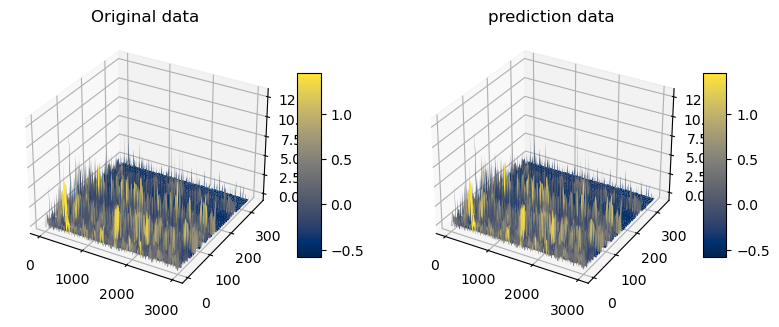

In [7]:
from mpl_toolkits.mplot3d.axes3d import get_test_data
from matplotlib import cm

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title('Original data')
t = X_train.shape[1]
n = X_train.shape[0]
time = np.linspace(1, t, t)
neurons = np.linspace(1, n, n)


T, N = np.meshgrid(time, neurons)
#surf = ax.plot_surface(T, N, spike_data[:,0:1000], cmap = plt.cm.cividis)
surf = ax.plot_surface(T, N, y_train, cmap = plt.cm.cividis)

fig.colorbar(surf, shrink=0.5, aspect=8)

# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title('prediction data')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
surf = ax.plot_surface(T, N, y_predict_opt, cmap = plt.cm.cividis)
fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

In [8]:
# testing 
y_test, X_test = x_test[:, 1:], x_test[:, :-1]

# One-step ahead prediction using both DMD models.
y_predict_dmd = dmd.predict(X_test)
y_predict_opt = optdmd.predict(X_test)

# Compute the one-step ahead prediction error.
dmd_error.append( norm(y_predict_dmd-y_test)/norm(y_test) )
optdmd_error.append( norm(y_predict_opt-y_test)/norm(y_test) )

print(y_predict_opt.shape)
print(optdmd_error)

(336, 99)
[0.19644579835286546]


In [9]:
print(y_test)

[[-0.38943437 -0.35277162 -0.30874655 ...  1.00151826  1.06753174
   1.13407749]
 [-0.01823057  0.00972754  0.03614294 ...  0.19828881  0.19301448
   0.19290984]
 [-0.10741476 -0.09725598 -0.08199046 ...  0.17164933  0.25094414
   0.33791354]
 ...
 [-0.53608036 -0.53691229 -0.53782477 ... -0.54053462 -0.53809289
  -0.5356117 ]
 [-0.53608036 -0.53691229 -0.53782477 ... -0.54053462 -0.53809289
  -0.5356117 ]
 [-0.53608036 -0.53691229 -0.53782477 ... -0.54053462 -0.53809289
  -0.5356117 ]]


In [10]:
print(y_predict_opt)

[[-0.3621937  -0.33312704 -0.29665953 ...  0.40848127  0.47643812
   0.547884  ]
 [ 0.00401882  0.02853825  0.04992743 ...  0.15933983  0.12705563
   0.1012973 ]
 [-0.00151335  0.01085064  0.02804712 ...  0.40772226  0.47202145
   0.54140095]
 ...
 [-0.52673511 -0.52675708 -0.5267393  ... -0.53312502 -0.53195192
  -0.53069397]
 [-0.52673511 -0.52675708 -0.5267393  ... -0.53312502 -0.53195192
  -0.53069397]
 [-0.52673511 -0.52675708 -0.5267393  ... -0.53312502 -0.53195192
  -0.53069397]]


In [11]:
from mpl_toolkits.mplot3d.axes3d import get_test_data
from matplotlib import cm
%matplotlib qt
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))
t = y_predict_opt.shape[1]
# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title('Original data')
time = np.linspace(1, t, t)
neurons = np.linspace(1, 336, 336)


T, N = np.meshgrid(time, neurons)
#surf = ax.plot_surface(T, N, spike_data[:,0:1000], cmap = plt.cm.cividis)
surf = ax.plot_surface(T, N, y_test, cmap = plt.cm.cividis)

fig.colorbar(surf, shrink=0.5, aspect=8)

# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title('prediction data')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
surf = ax.plot_surface(T, N, y_predict_opt, cmap = plt.cm.cividis)
fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

In [12]:
# Large number of training data points required to generate accurate prediction for a significantly
# small test window.
# Need a rank vs prediction error analysis and traning data dimension vs testing data dimensinon analysis
# test bagged optimised DMD 